- Convolution layer
- Activation Function: RELU
- Pooling layer: reduce the data amount by preserving the key features (e.g. maxpooling)
- Fully connected layer: transform the feature map (from convolutions) into a 1d dimension vector, and then through the activation function (usually softmax or sigmoid) processing, to probability of each class, and choose the max probability for the final result

In [1]:
#载入环境
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#读取文件
train = pd.read_csv('gdrive/MyDrive/Colab Notebooks/KNN_and_CNN/Kannada-MNIST/train.csv')
validate = pd.read_csv('gdrive/MyDrive/Colab Notebooks/KNN_and_CNN/Kannada-MNIST/Dig-MNIST.csv')

In [5]:
#检查形状
print(train.shape, validate.shape)

(60000, 785) (10240, 785)


In [6]:
#可视化检查数据分布
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


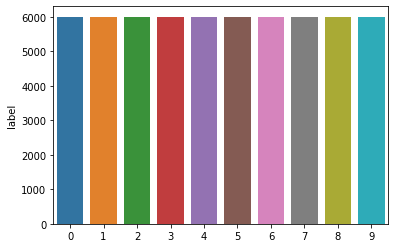

In [7]:
#观察是否均匀
y = train.label.value_counts()
sns.barplot(y.index, y)

In [8]:
#分离训练数据和标签
train_images = train.drop('label', axis = 1)
train_labels = train.label
val_images = validate.drop('label', axis = 1)
val_labels = validate.label

In [9]:
#归一化处理
train_images = train_images / 255
val_images = val_images / 255   

In [10]:
#reshape图像数据，使得TensorFlow可以识别
train_images = train_images.values.reshape(-1, 28, 28, 1)
val_images = val_images.values.reshape(-1, 28, 28, 1)

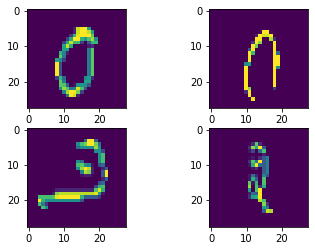

In [11]:
#reshape的结果
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_images[i][:, :, 0])
plt.show()

In [12]:
#编码化label
train_labels = to_categorical(train_labels) #猫[1, 0]     狗[0, 1]
val_labels = to_categorical(val_labels) 

In [13]:
#从训练数据中分离训练集和测试集
train_images,test_images,train_labels,test_labels = train_test_split(train_images, train_labels, 
                                                                     random_state = 0, test_size = 0.2)

In [14]:
#建立模型
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu', input_shape = (28, 28, 1)))   
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [15]:
#检查模型
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [16]:
#设置优化器
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = optimizer, loss = ['categorical_crossentropy'],
             metrics = ['accuracy'])

In [18]:
#设置训练参数
epochs = 3
batch_size = 64

In [19]:
#训练模型并记录训练结果
history = model.fit(train_images, train_labels,
                   batch_size = batch_size, epochs = epochs)

Epoch 1/3
750/750 [==============================] - 115s 152ms/step - loss: 0.3134 - accuracy: 0.8962
Epoch 2/3
750/750 [==============================] - 111s 148ms/step - loss: 0.0832 - accuracy: 0.9752
Epoch 3/3
750/750 [==============================] - 117s 155ms/step - loss: 0.0636 - accuracy: 0.9807


Text(0, 0.5, 'accuracy')

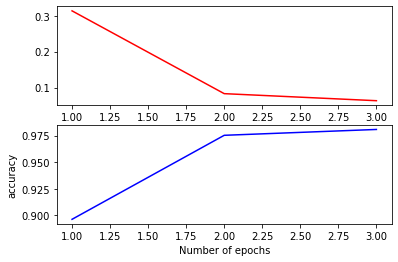

In [20]:
#%%准确率可视化
fig,ax = plt.subplots(2, 1)
fig.set
x = range(1,1 + epochs)
ax[0].plot(x,history.history['loss'],color = 'red')

ax[1].plot(x,history.history['accuracy'],color = 'blue')

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

In [21]:
#用validate数据集验证模型效果
prediction = model.predict(val_images)
prediction = np.argmax(prediction, axis = 1) 
true_label = np.argmax(val_labels, axis = 1) 

320/320 [==============================] - 6s 19ms/step


In [22]:
#计算confusion matrix
cm = confusion_matrix(true_label, prediction)
cm = pd.DataFrame(cm,index=range(0,10),columns=range(0,10))
print(cm)

     0    1    2    3    4    5    6    7    8    9
0  549   36   30   33    2   14   23   11   82  244
1  126  721   34   13    5   15    0   18   66   26
2   13    1  939    6    3   37    8    1   13    3
3    7    2   96  573    5  270   11   53    4    3
4    2    5   24    2  840   38    2    5   80   26
5    0    3    1    1   14  964    0    0   41    0
6    1    0   27   13   50   42  690  121   17   63
7    2    2   33    7    2    8  183  764    9   14
8    0    3   39    0    0   18   20    4  871   69
9    0    4    5    0    1    3   66    8   19  918


In [23]:
#计算是否正确
pre_result = (prediction - true_label == 0).tolist()

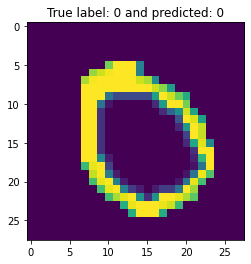

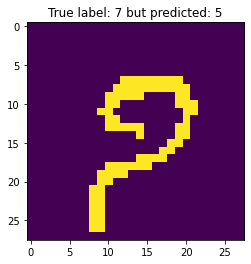

In [24]:
#查看一个正确的和一个错误的结果
for i in range(len(pre_result)):
    if pre_result[i] == True:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' and predicted: ' + str(prediction[i]))
        break

for i in range(len(pre_result)):
    if pre_result[i] == False:
        plt.figure()
        plt.imshow(val_images[i][:, :, 0])
        plt.title('True label: ' + str(true_label[i]) + ' but predicted: ' + str(prediction[i]))
        break